# Problems

## 1. Shipments of Household Appliances: Line Graphs.

The file `ApplianceShipments.csv` contains the series of quarterly shipments (in millions of dollars) of US household appliances between 1985 and 1989.

a. Create a well-formatted time plot of the data using Python.

b. Does there appear to be a quarterly pattern? For a closer view of the patterns, zoom in to the range of 3500–5000 on the y-axis.

c. Using Python, create one chart with four separate lines, one line for each of Q1, Q2, Q3, and Q4. In Python, this can be achieved by add column for quarter and year. Then group the data frame by quarter and then plot shipment versus year for each quarter as a separate series on a line graph. Zoom in to the range of 3500–5000 on the y-axis. Does there appear to be a difference between quarters?

d. Using Python, create a line graph of the series at a yearly aggregated level (i.e., the total shipments in each year).

a.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
shipments_df = pd.read_csv("../datasets/ApplianceShipments.csv")
shipments_df.head()

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123


In [3]:
quarters = shipments_df.Quarter.str.replace(r"(Q\d)-([0-9]+)", r"\2\1", regex=True)

shipments_df["Date"] = pd.PeriodIndex(quarters, freq="Q")
shipments_ts = pd.Series(shipments_df.Shipments.values, index=shipments_df.Date)

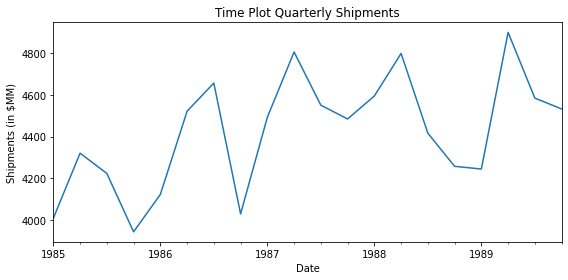

In [4]:
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True)
shipments_ts.plot(ax=ax, legend=False)
ax.set_ylabel("Shipments (in $MM)")
ax.set_title("Time Plot Quarterly Shipments")
plt.show()

b.

It appears to have a quarterly pattern, let's zoom (3,500 - 5,000 on y-axis):

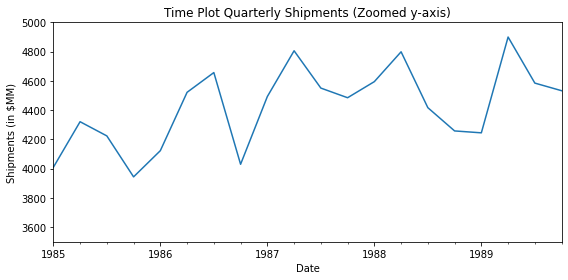

In [5]:
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True)

shipments_ts.plot(ylim=[3500, 5000], ax=ax, legend=False)
ax.set_ylabel("Shipments (in $MM)")
ax.set_title("Time Plot Quarterly Shipments (Zoomed y-axis)")
plt.show()

c.

In [6]:
quarter_and_year_df = shipments_df.Quarter.str.split("-", expand=True)
shipments_df = shipments_df.merge(quarter_and_year_df, left_index=True, right_index=True)

shipments_df.rename(columns={0:"Q", 1:"Y"}, inplace=True)
shipments_df.head()

,Quarter,Shipments,Date,Q,Y
0,Q1-1985,4009,1985Q1,Q1,1985
1,Q2-1985,4321,1985Q2,Q2,1985
2,Q3-1985,4224,1985Q3,Q3,1985
3,Q4-1985,3944,1985Q4,Q4,1985
4,Q1-1986,4123,1986Q1,Q1,1986


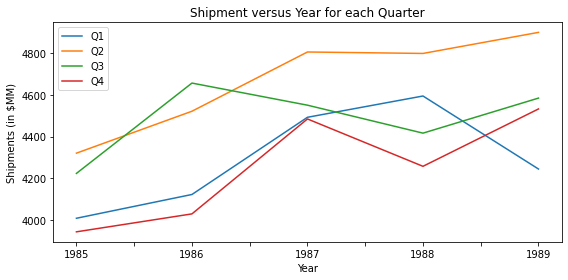

In [7]:
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True)

for group, ships_by_year in shipments_df.groupby("Q"):
    ships_by_year.plot(x="Y", y="Shipments", ax=ax, label=group)

ax.set_title("Shipment versus Year for each Quarter")
ax.set_ylabel("Shipments (in $MM)")
ax.set_xlabel("Year")

plt.show()

Q2 and Q3 have more shipments than Q1 and Q4 (this behavior repeats throughout the years). It is also possible to see that the shipments increase as the years advance, independently of the quarter.  

d.

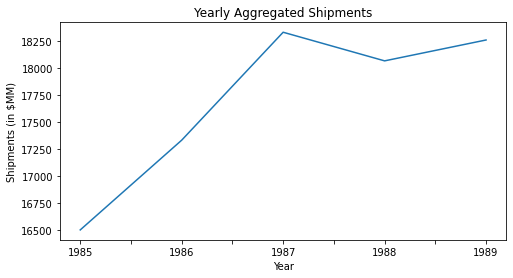

In [8]:
ax = shipments_df.groupby("Y").sum().plot(figsize=(8, 4), legend=False)

ax.set_title("Yearly Aggregated Shipments")
ax.set_ylabel("Shipments (in $MM)")
ax.set_xlabel("Year")

plt.show()

## 2. Sales of Riding Mowers: Scatter Plots.

A company that manufactures riding mowers wants to identify the best sales prospects for an intensive sales campaign. In particular, the manufacturer is interested in classifying households as prospective owners or nonowners on the basis of Income (in $1000s) and Lot Size (in 1000 ft 2 ). The marketing expert looked at a random sample of 24 households, given in the file `RidingMowers.csv`.

a. Using Python, create a scatter plot of Lot Size vs. Income, color-coded by the outcome variable owner/nonowner. Make sure to obtain a well-formatted plot (create legible labels and a legend, etc.).

In [9]:
mowers_df = pd.read_csv("../datasets/RidingMowers.csv")
mowers_df.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


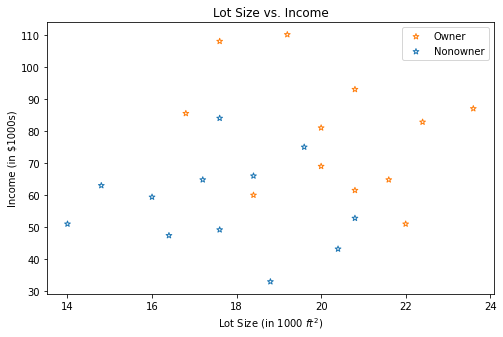

In [10]:
# plot first the data points for Ownership equals "Owner" and then of "Nonowner"
# setting color to "none" gives open circles

_, ax = plt.subplots(figsize=(8, 5))
for cat_value, color in [("Owner", "C1"), ("Nonowner", "C0")]:
    subset_df = mowers_df[mowers_df.Ownership == cat_value]
    ax.scatter(subset_df.Lot_Size, subset_df.Income, color="none",
               edgecolor=color, marker="*")
    
ax.set_title("Lot Size vs. Income")
ax.set_xlabel("Lot Size (in 1000 $ft^2$)")
ax.set_ylabel("Income (in $1000s)")
ax.legend(["Owner", "Nonowner"])
plt.show()

## 3. Laptop Sales at a London Computer Chain: Bar Charts and Boxplots.

The file `LaptopSalesJanuary2008.csv` contains data for all sales of laptops at a computer chain in London in January 2008. This is a subset of the full dataset that includes data for the entire year.

a. Create a bar chart, showing the average retail price by store. Which store has the highest average? Which has the lowest?

b. To better compare retail prices across stores, create side-by-side boxplots of retail price by store. Now compare the prices in the two stores from (a). Does there seem to be a difference between their price distributions?

In [11]:
laptops_sales_jan_df = pd.read_csv("../datasets/LaptopSalesJanuary2008.csv")
laptops_sales_jan_df.head()

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,OS X Customer,OS Y Customer,OS X Store,OS Y Store,CustomerStoreDistance
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0,2405.873022
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0,2507.558574
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0,3194.001409
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0,4155.202281
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0,3729.298057


a. 

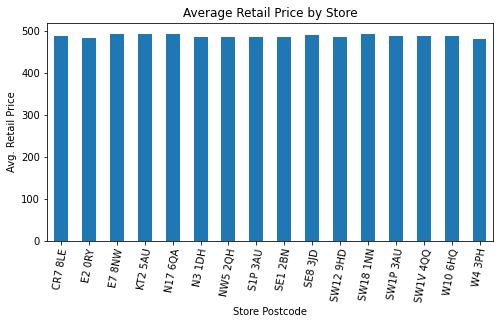

In [12]:
# barchart of average retail price by store
laptops_sales_jan_df.groupby("Store Postcode").mean()["Retail Price"].plot(kind="bar", figsize=(8, 4))

plt.title("Average Retail Price by Store")
plt.ylabel("Avg. Retail Price")
plt.xticks(rotation=80)
plt.show()

In [13]:
laptops_sales_jan_df.groupby("Store Postcode").mean()["Retail Price"].sort_values(ascending=False)

Store Postcode
N17 6QA     494.634146
E7 8NW      494.381443
KT2 5AU     493.904762
SW18 1NN    493.038922
SE8 3JD     492.177778
W10 6HQ     489.866667
SW1V 4QQ    489.344978
CR7 8LE     488.619048
SW1P 3AU    488.506858
N3 1DH      487.368421
SE1 2BN     486.680195
NW5 2QH     486.580460
S1P 3AU     486.250000
SW12 9HD    485.295699
E2 0RY      483.171729
W4 3PH      481.006289
Name: Retail Price, dtype: float64

Well, the average retail price is pretty much the same between the stores. The highest average is 494.634146 (store at N17 6QA) and the lowest is 481.006289 (store at W4 3PH).

b.

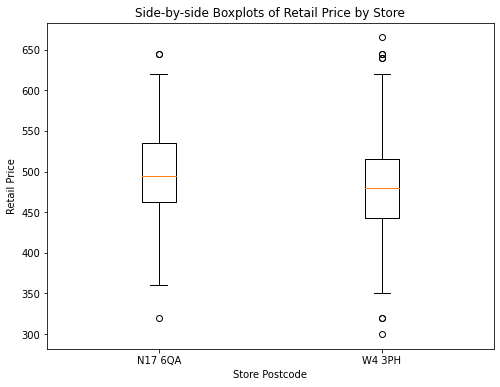

In [14]:
# alternative plot with matplotlib
data_for_plot = [list(laptops_sales_jan_df[laptops_sales_jan_df["Store Postcode"] == "N17 6QA"]["Retail Price"]),
                 list(laptops_sales_jan_df[laptops_sales_jan_df["Store Postcode"] == "W4 3PH"]["Retail Price"])]
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(data_for_plot)

ax.set_title("Side-by-side Boxplots of Retail Price by Store")
ax.set_xticks([1, 2])
ax.set_xticklabels(["N17 6QA", "W4 3PH"])
ax.set_xlabel("Store Postcode")
ax.set_ylabel("Retail Price")
plt.show()

50% of their price retails distribution overlaps somehow. Their median values are also pretty close, about 450 to 500 pounds; the top and bottom of the boxes (75th and 25th) are also near each other. Therefore, there is not significant difference of retail distribution and we can assume that "Retail Price" is no a good predictor attribute.